<a href="https://colab.research.google.com/github/taufixhdyt/Machine-Learning-Fundamentals/blob/main/UASPraktek_G_211_21_0103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [3]:
df = pd.read_csv("Real-estate1.csv")
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#Preprocessing

In [4]:
df.shape

(414, 8)

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
print(df.isnull().sum())

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [8]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


#EDA

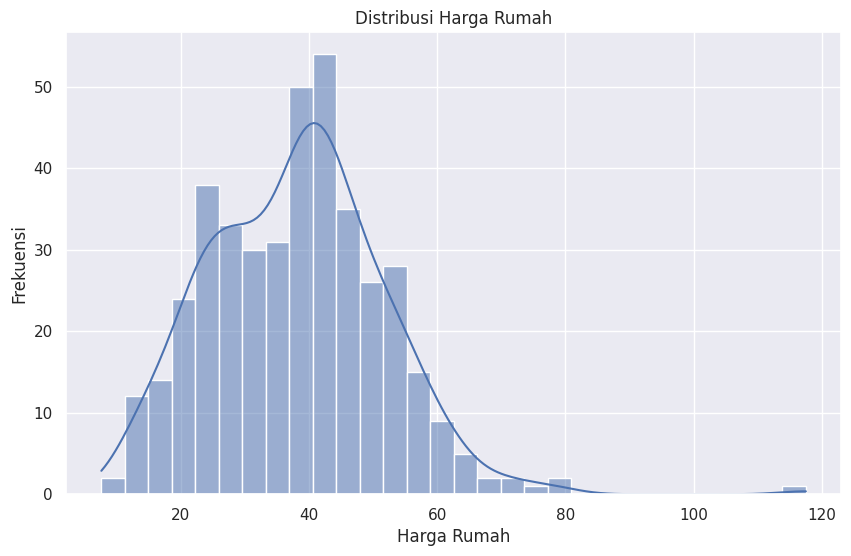

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Y house price of unit area'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga Rumah')
plt.ylabel('Frekuensi')
plt.show()

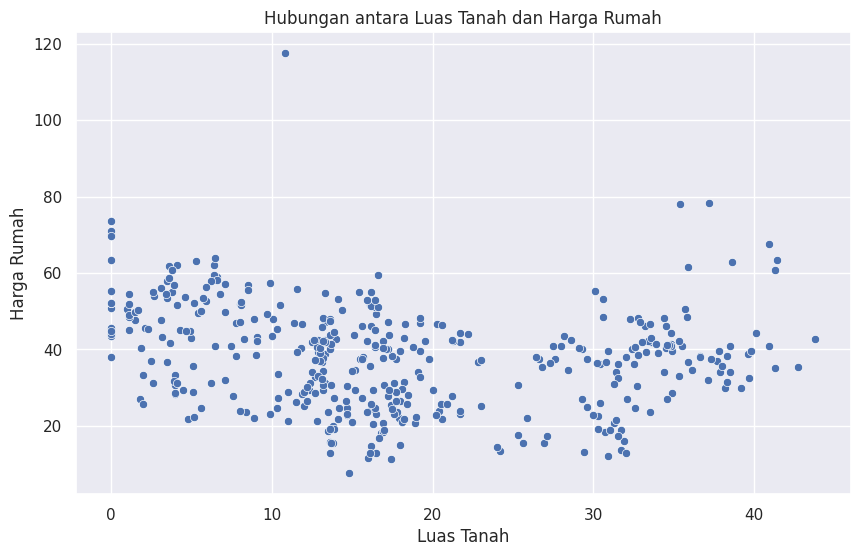

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=df)
plt.title('Hubungan antara Luas Tanah dan Harga Rumah')
plt.xlabel('Luas Tanah')
plt.ylabel('Harga Rumah')
plt.show()

<Axes: >

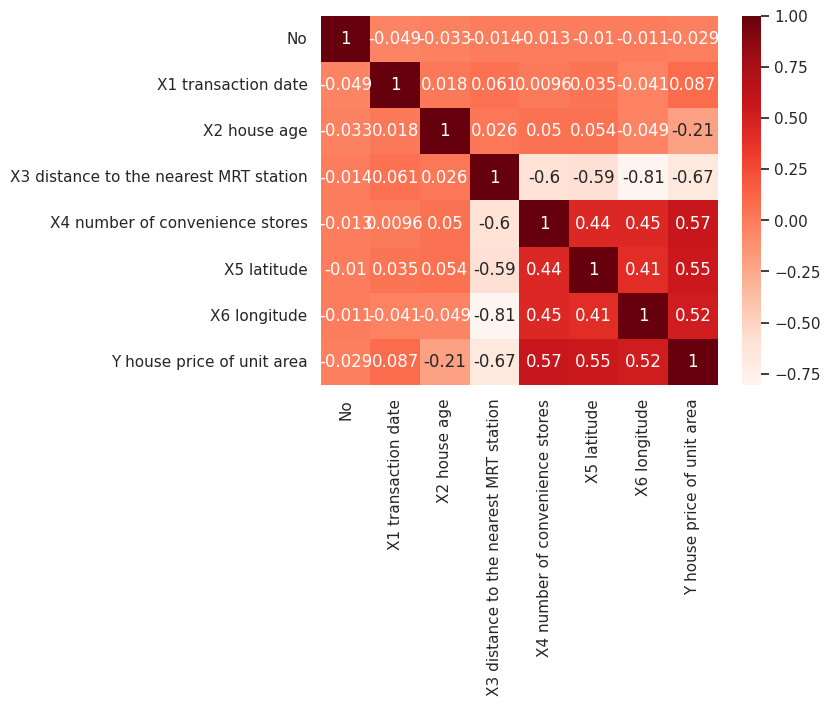

In [13]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

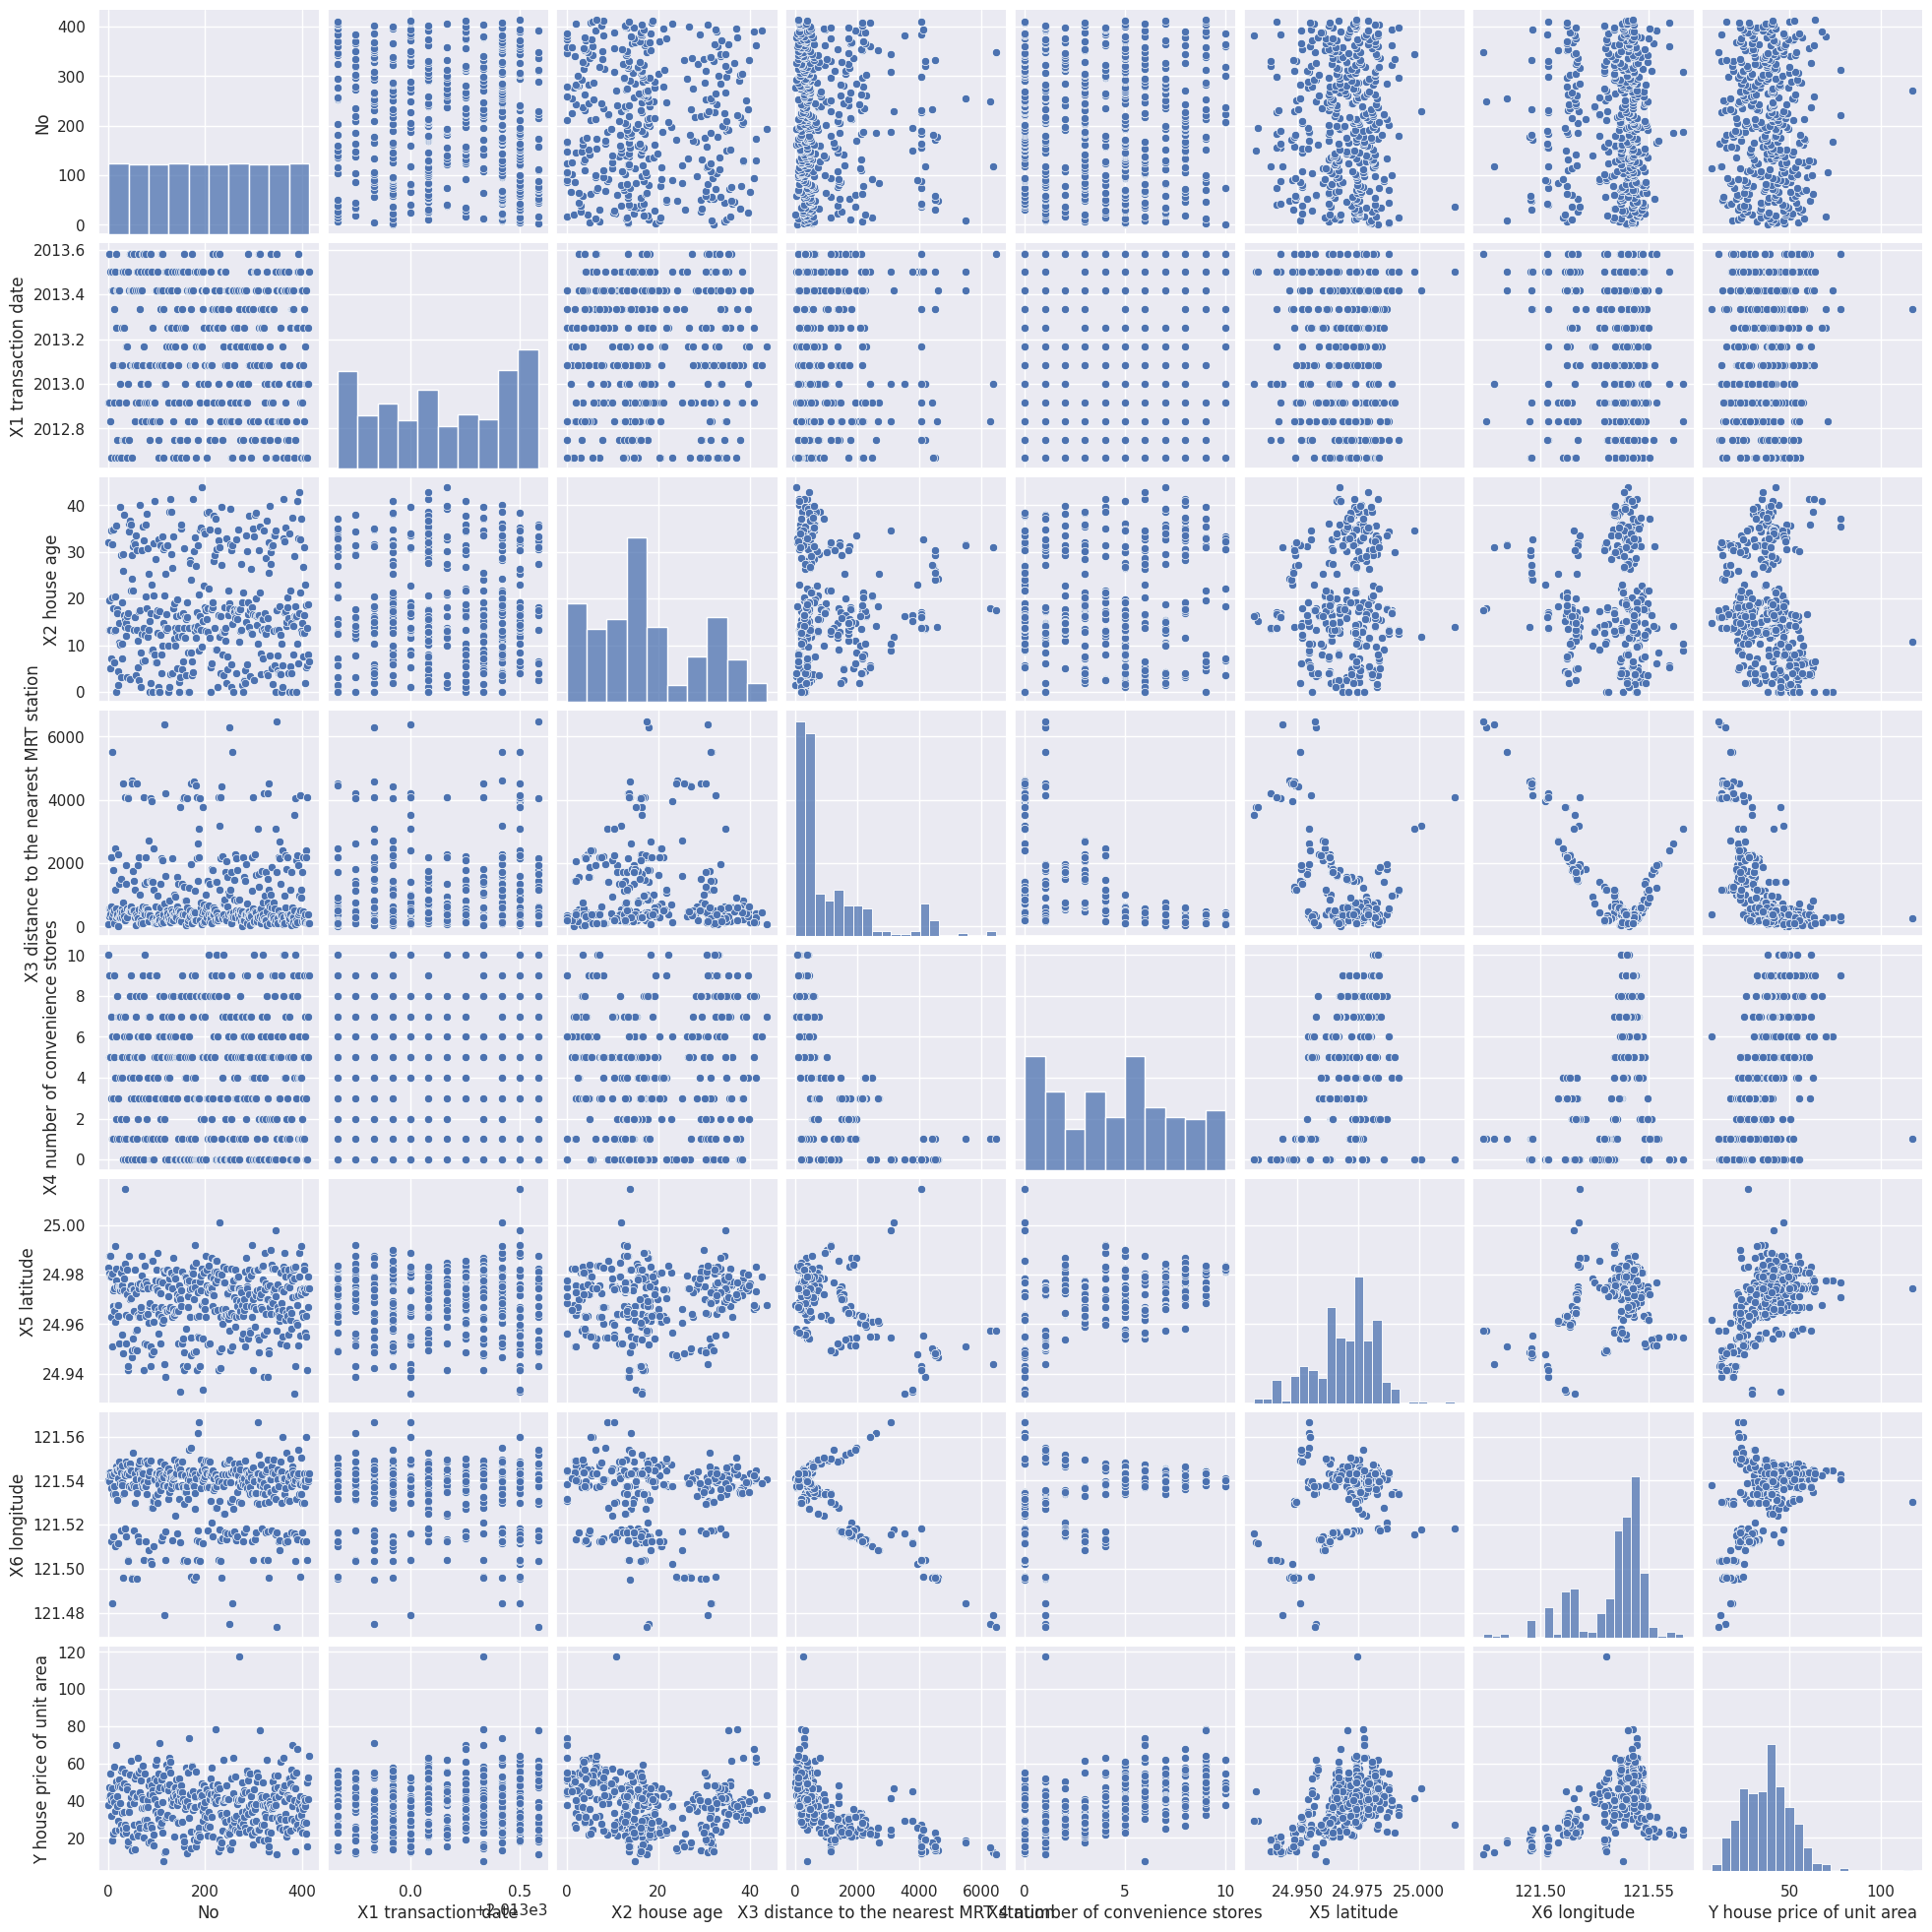

In [14]:
sns.pairplot(df)

#Metode Linear Regression

In [38]:
X=df.drop('Y house price of unit area', axis=1)
y=df['X4 number of convenience stores']
print("X=",X.shape,"\ny=", y.shape)

X= (414, 7) 
y= (414,)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
X_train.shape

(289, 7)

In [41]:
X_test.shape

(125, 7)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
model.coef_

array([-1.49344835e-17, -9.09342046e-15, -1.36338423e-16,  1.73472348e-18,
        1.00000000e+00,  1.28927721e-14,  1.08238203e-14])

In [44]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
No,-1.493448e-17
X1 transaction date,-9.093420e-15
X2 house age,-1.363384e-16
X3 distance to the nearest MRT station,1.734723e-18
X4 number of convenience stores,1.000000e+00
X5 latitude,1.289277e-14
X6 longitude,1.082382e-14


#Evaluasi/Akurasi

In [45]:
y_pred = model.predict(X_test)

In [47]:
from sklearn import metrics

MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [48]:
MAE

4.231748536250847e-15

In [49]:
MSE

2.718688400256278e-29

In [50]:
RMSE

5.214104333685967e-15

In [58]:
df['X4 number of convenience stores'].mean()

4.094202898550725

In [59]:
test_residual= y_test - y_pred

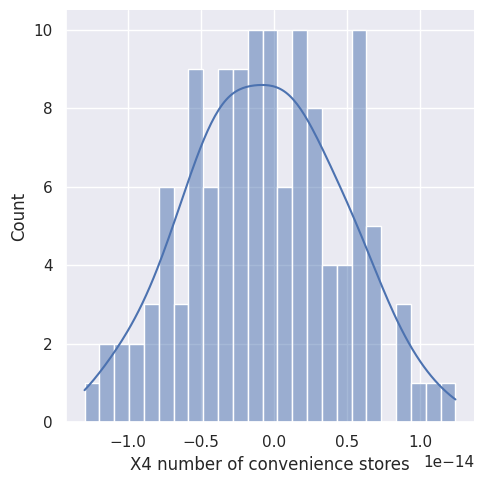

In [77]:
sns.displot(test_residual, bins=25, kde=True)

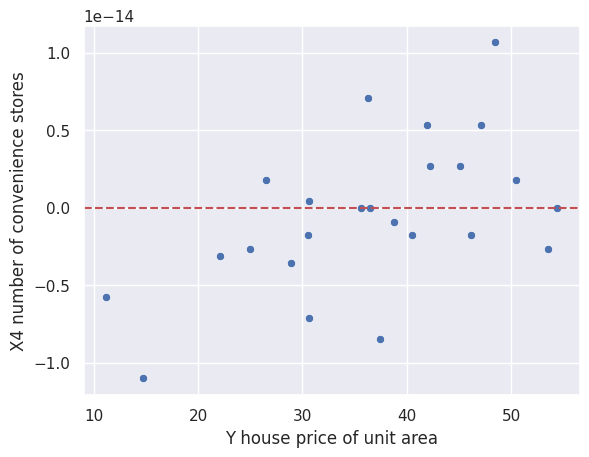

In [87]:
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='r', ls='--')

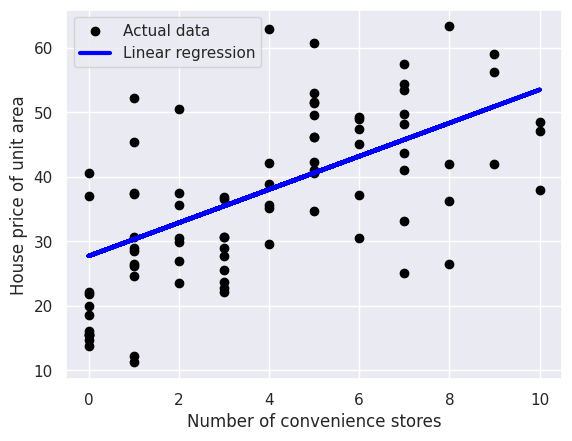

In [92]:
y = df['Y house price of unit area']

plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear regression')
plt.xlabel('Number of convenience stores')
plt.ylabel('House price of unit area')
plt.legend()
plt.show()